# LABORATORIO 1 Ejercicio de programación Regresión Lineal


Universitario: Aly Delgado Danner Abel  
Data set: Diabetes

Link del DataSet: https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset

Link de repositorio en Git Hub: https://github.com/DannerAly/Inteligencia-Artificial-I.git





# Ejercicio de programación Regresión Lineal

En esta oportunidad entrenaremos el modelo para la predicción de cantidad de glucosa de una persona en funcion a su edad Usando regresión lineal simple

In [216]:
# utilizado para manejos de directorios y rutas
import os

# utilizamos pandas para poder manejar columnas (caracteristicas especificas del data set)
# en este caso la edad y cantidad de glucosa
import pandas as pd


# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

## 1 Regresión lineal con una variable

El data set nombra diabetes.csv y esta en mi repositorio de drive, de todas formas tambien subo el dataset en la carpeta de laboratorio 1, esta parte de codigo se debe comentar, si es que no se esta en Colab

In [217]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Comente estas lineas de codigo debido a que usare pandas para definir los arrays de X y Y

In [218]:
# Leer datos separados por una coma
# data = np.loadtxt(os.path.join('data', 'ex1data1.txt'), delimiter=',')
#data = np.loadtxt('/content/drive/Othercomputers/HP corei7/estudio/IA/datasets/ex1data1.txt', delimiter=',')
#X, y = data[:, 0], data[:, 1]
#m = y.size  # m = numero de ejemplos de entrenamiento



# Cargar el archivo CSV
data = '/content/drive/Othercomputers/HP corei7/estudio/IA/datasets/MIOS/diabetes.csv'
df = pd.read_csv(data)

# Mostrar las primeras filas del dataframe para verificar las columnas
#df.head()
print(df.columns)

X = df['Age'].values
y = df['Glucose'].values

m = y.size  # m = numero de ejemplos de entrenamiento


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [219]:
print(X)

[50 31 32 21 33 30 26 29 53 54 30 34 57 59 51 32 31 31 33 32 27 50 41 29
 51 41 43 22 57 38 60 28 22 28 45 33 35 46 27 56 26 37 48 54 40 25 29 22
 31 24 22 26 30 58 42 21 41 31 44 22 21 39 36 24 42 32 38 54 25 27 28 26
 42 23 22 22 41 27 26 24 22 22 36 22 37 27 45 26 43 24 21 34 42 60 21 40
 24 22 23 31 33 22 21 24 27 21 27 37 25 24 24 46 23 25 39 61 38 25 22 21
 25 24 23 69 23 26 30 23 40 62 33 33 30 39 26 31 21 22 29 28 55 38 22 42
 23 21 41 34 65 22 24 37 42 23 43 36 21 23 22 47 36 45 27 21 32 41 22 34
 29 29 36 29 25 23 33 36 42 26 47 37 32 23 21 27 40 41 60 33 31 25 21 40
 36 40 42 29 21 23 26 29 21 28 32 27 55 27 57 52 21 41 25 24 60 24 36 38
 25 32 32 41 21 66 37 61 26 22 26 24 31 24 22 46 22 29 23 26 51 23 32 27
 21 22 22 33 29 49 41 23 34 23 42 27 24 25 44 21 30 25 24 51 34 27 24 63
 35 43 25 24 21 28 38 21 40 21 52 25 29 23 57 22 28 39 37 47 52 51 34 29
 26 33 21 25 31 24 65 28 29 24 46 58 30 25 35 28 37 29 47 21 25 30 41 22
 27 25 43 26 30 29 28 59 31 25 36 43 21 24 30 37 23

In [220]:
print(y)

[148  85 183  89 137 116  78 115 197 125 110 168 139 189 166 100 118 107
 103 115 126  99 196 119 143 125 147  97 145 117 109 158  88  92 122 103
 138 102  90 111 180 133 106 171 159 180 146  71 103 105 103 101  88 176
 150  73 187 100 146 105  84 133  44 141 114  99 109 109  95 146 100 139
 126 129  79   0  62  95 131 112 113  74  83 101 137 110 106 100 136 107
  80 123  81 134 142 144  92  71  93 122 163 151 125  81  85 126  96 144
  83  95 171 155  89  76 160 146 124  78  97  99 162 111 107 132 113  88
 120 118 117 105 173 122 170  84  96 125 100  93 129 105 128 106 108 108
 154 102  57 106 147  90 136 114 156 153 188 152  99 109  88 163 151 102
 114 100 131 104 148 120 110 111 102 134  87  79  75 179  85 129 143 130
  87 119   0  73 141 194 181 128 109 139 111 123 159 135  85 158 105 107
 109 148 113 138 108  99 103 111 196 162  96 184  81 147 179 140 112 151
 109 125  85 112 177 158 119 142 100  87 101 162 197 117 142 134  79 122
  74 171 181 179 164 104  91  91 139 119 146 184 12

In [221]:
print(X.size)

768


### 1.1 Trazar los datos

In [222]:
def plotData(x, y):
    #Grafica los puntos x e y en una figura nueva.

    fig = pyplot.figure()  # abre una nueva figura

    pyplot.plot(x, y, 'ro', ms=10, mec='k')

    pyplot.ylabel('Glucosa')
    pyplot.xlabel('Edad')
    pyplot.title('Datos de Diabetes')


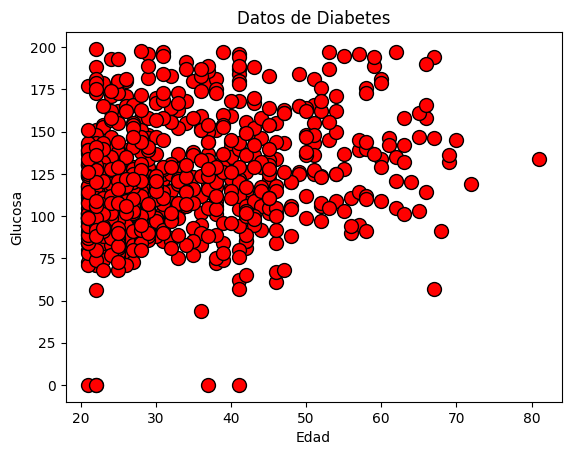

In [223]:
plotData(X, y)

In [224]:
# ?pyplot.plot

# <a id="section2"></a>
### 1.2 Descenso por el gradiente

#### 1.2.1 Ecuaciones de actualización

El objetivo de la regresion lineal es minimizar la funcion de costo

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$$

donde la hipotesis $h_\theta(x)$ esta dada por el modelo lineal
$$ h_\theta(x) = \theta^Tx = \theta_0 + \theta_1 x_1$$

Los parametros del modelo son los valores $\theta_j$. Estos son los valores que se ajustaran al costo minimo $J(\theta)$. Un camino para lograr esto es usar el algoritmo por lotes del descenso por el gradiente. En el descenso por el gradiente por lotes, cada iteracion ejecuta una actualizacion
$$ \theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x_j^{(i)} \qquad \text{actualizacion simultanea } \theta_j \text{ for all } j$$

Con cada paso del descenso por el gradiente, los parametros $\theta_j$ son mas cercanos a los valores optimos que permitiran lograr el costo mas bajo J($\theta$).

#### 1.2.2 Implementación

In [225]:
# Agrega una columna de unos a X. La funcion stack de numpy une matrices a lo largo de un eje dado.
# El primer eje (eje = 0) se refiere a filas (ejemplos de entrenamiento)
# y el segundo eje (eje = 1) se refiere a columnas (características).

X = np.stack([np.ones(m), X], axis=1)

Aquí podemos observar la columna añadida de unos en x, esto para poder operar con matrices

In [226]:
print(X)

[[ 1. 50.]
 [ 1. 31.]
 [ 1. 32.]
 ...
 [ 1. 30.]
 [ 1. 47.]
 [ 1. 23.]]


<a id="section2"></a>
#### 1.2.3 Cálculo del costo $J(\theta)$

In [227]:
def computeCost(X, y, theta):
    # inicializa algunos valores importantes
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    #h = np.dot(X, theta)
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    return J

Ejemplo de funcionamiento de la funcion computeCoste con dos valores diferentes de $\theta$.

In [228]:
J = computeCost(X, y, theta=np.array([0.0, 0.0]))
print('Con theta = [0, 0] \n Costo calculado = %.2f' % J)


Con theta = [0, 0] 
 Costo calculado = 7818.20


<a id="section3"></a>
#### 1.2.4 Descenso por el gradiente

El costo $J(\theta)$ esta parametrizado por el vector $\theta$, no $X$ y $y$. Donde hay que minimizar el valor de $J(\theta)$ cambiando los valores del vector $\theta$. Una buena manera de verificar si el descenso por el gradiente esta trabajando correctamente es ver los valores de $J(\theta)$ y verificar si estos decresen en cada paso.

<div class="alert alert-box alert-warning">
**Vectores y matrices en `numpy`** - Importantes notas para implementación
Un vector en `numpy` es un array de una diemension, por ejemplo `np.array([1, 2, 3])` es un vector. Una matriz en `numpy` is un arreglo de dos dimensiones, por ejemplo  `np.array([[1, 2, 3], [4, 5, 6]])`. Sin embargo, lo siguiente todavía se considera una matriz `np.array ([[1, 2, 3]])` ya que tiene dos dimensiones, incluso si tiene una forma de 1x3 (que parece un vector).

In [229]:
def gradientDescent(X, y, theta, alpha, num_iters):
        # Inicializa algunos valores importantes
    m = y.shape[0]  # numero de ejemplos de entrenamiento

    # hace una copia de theta, para evitar cambiar la matriz original,
    # ya que las matrices numpy se pasan por referencia a las funciones

    theta = theta.copy()

    J_history = [] # Lista que se utiliza para almacenar el costo en cada iteración

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        # save the cost J in every iteration
        J_history.append(computeCost(X, y, theta))

    return theta, J_history

Se inicializan los parametros $\theta$ con 0 y la taza de aprendizaje $\alpha$ con 0.01.

In [230]:
# inicializa los parametros de ajuste
theta = np.zeros(2)

# configuraciones para el descenso por el gradiente
iterations = 500
alpha = 0.00001


theta, J_history = gradientDescent(X ,y, theta, alpha, iterations)
print('Theta encontrada por descenso gradiente: {:.4f}, {:.4f}'.format(*theta))

error = computeCost(X, y, theta)
print('\n Costo calculado = %.2f' % J)

Theta encontrada por descenso gradiente: 0.1422, 3.3025

 Costo calculado = 7818.20


Se utilizan los parametros finales para grafical la linea.

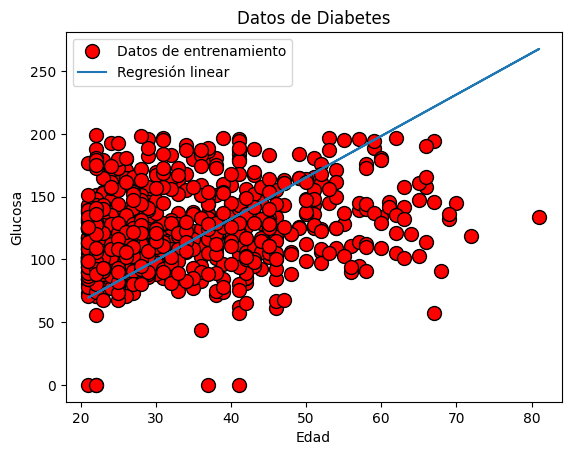

In [231]:
# grafica la linea de ajuste
plotData(X[:, 1], y)
pyplot.plot(X[:, 1], np.dot(X, theta), '-')
pyplot.legend(['Datos de entrenamiento', 'Regresión linear']);

Los valores finales de $\theta$ se utilizaran para realizar predicciones.

In [232]:
# Predecir valores de glucosa para edades de 35 y 70
predict1 = np.dot([1, 35], theta)
print('Para una edad de = 35, se predice un nivel de glucosa de {:.2f}\n'.format(predict1))

predict2 = np.dot([1, 70], theta)
print('Para una edad de = 70, se predice un nivel de glucosa de {:.2f}\n'.format(predict2))

Para una edad de = 35, se predice un nivel de glucosa de 115.73

Para una edad de = 70, se predice un nivel de glucosa de 231.32



### 1.4 Visualizar $J(\theta)$

Para comprender mejor la función de costo $J(\theta)$, se graficará la funcion de costo en 2 dimenciones con los valores de $\theta_0$ y $\theta_1$.

El proposito de graficar el costo para observar como $J(\theta)$ varia con cambios en $\theta_0$ y $\theta_1$. La función de costo  $J(\theta)$ tiene forma de una cuenca con un minimo global. (Esto es mas facil observar en los contornos de una superficie 3D). El minimo es el punto optimo para $\theta_0$ y $\theta_1$, en cada paso del descenso por el gradiente se mueve mas cerca a este punto.

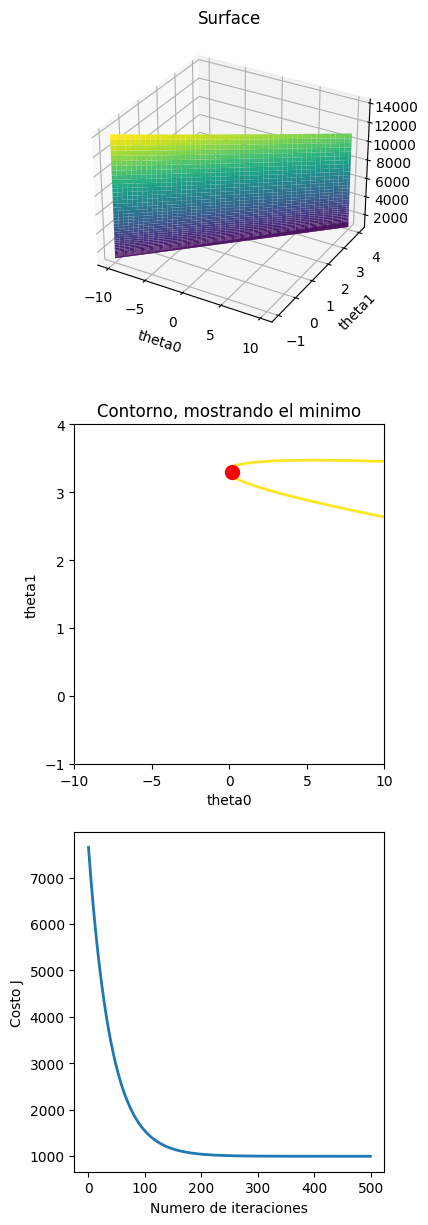

In [233]:
# cuadrícula sobre la que se calcula J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# inicializa J_vals con una matriz de 0's
J_vals = np.zeros((theta0_vals.shape[0], theta1_vals.shape[0]))

# Completar J_vals
for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        J_vals[i, j] = computeCost(X, y, [theta0, theta1])

# Debido a la forma en que funcionan las cuadrículas en el comando surf,
# se necesita transponer J_vals antes de llamar a surf, o de lo contrario los ejes se invertirán
J_vals = J_vals.T

# graficar la superficie
fig = pyplot.figure(figsize=(4, 15))
ax = fig.add_subplot(311, projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap='viridis')
pyplot.xlabel('theta0')
pyplot.ylabel('theta1')
pyplot.title('Surface')

# graficar contornos
# Grafica J_vals como 15 contours spaciados logaritmicamente entre 0.01 y 100
ax = pyplot.subplot(312)
pyplot.contour(theta0_vals, theta1_vals, J_vals, linewidths=2, cmap='viridis', levels=np.logspace(-2, 3, 20))
pyplot.xlabel('theta0')
pyplot.ylabel('theta1')
pyplot.plot(theta[0], theta[1], 'ro', ms=10, lw=2)
pyplot.title('Contorno, mostrando el minimo')


# Grafica la convergencia del costo
ax = pyplot.subplot(313)
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

pass

Aquí podemos verificar el comportamiento del costo lo que nos indica que estamos en el menor error que se puede lograr